# A Project on - Classification of Iris Species

Project Overview
The iris dataset contains the data related to Iris flowers and its features, the main objective of this dataset is to create a model which can help us in predicitn the species of a given flower. The class/species of a particular flower may be dependent of the width and height of it's petal as well as sepal. The purpose of this project is to visually see if some class can be identify based on width and height of patals and sepals, next create a classifier to identify the class of a flower based on other parameters, for this we will use some KNN Classifcation technique

<b>Data Information<b> The dataset contains- 50 samples of 3 different species of iris (150 samples total)

<b>Attribute Information:<b>

1.sepal length in cm
2.sepal width in cm
3.petal length in cm
4.petal width in cm
5.class:
-- Iris Setosa
-- Iris Versicolour -- Iris Virginica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplt

In [2]:
# Run this cell using CTRL + Enter
# There is no headers in the file so we will give custom headers to the data.
headers = ["sepal_length","sepal_width","petal_length", "petal_width","class"]
# The path of csv file will hold the IRIS Dataset is stored in the variable called file_location
file_location = "iris_data.csv"

In [3]:
# Reading the iris data and adding column names
idata = pd.read_csv("iris_data.csv", header=None, names=headers)
idata # It truncates some rows and is displayed- I get the first 30 and the last 30 rows

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Now display the first few line of the idata DataFrame and see what are the column names and type of data available under each column
#Type of column can be continuous, discrete, categorical etc.

idata.head() # First five rows
idata.columns # Column names
type(idata['sepal_length'])
type(idata['sepal_width'])
type(idata['petal_length'])
type(idata['petal_width'])
type(idata['class'])

# All the above are of type pandas.core.series.Series

pandas.core.series.Series

In [5]:
#Displaying the basic statistics
idata.describe()
#I get the count, mean, std, min, 25%,50%,75% - I think percentile, max
# Oh, we don't get anything about class!

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,150.000000
mean,5.849660,3.051020,3.767347,1.198667
std,0.833492,0.436419,1.769497,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Step 2- Data Cleaning and Handling

In [6]:
#Printing the different values of column 'class'
idata['class'].unique()
#How many of them? Here's the answer
idata['class'].nunique(dropna=True)

3

In [7]:
#Finding out if any column has NaN values
idata.columns[idata.isna().any()].tolist()
#As already seen, only petal_width column is complete

['sepal_length', 'sepal_width', 'petal_length']

In [8]:
idata.fillna({'sepal_length':idata['sepal_length'].mean(),
              'sepal_width':idata['sepal_width'].mean(),
              'petal_length':idata['petal_length'].mean()}, inplace=True)
idata

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.10000,3.50000,1.4,0.2,Iris-setosa
1,4.90000,3.00000,1.4,0.2,Iris-setosa
2,4.70000,3.20000,1.3,0.2,Iris-setosa
3,4.60000,3.10000,1.5,0.2,Iris-setosa
4,5.00000,3.60000,1.4,0.2,Iris-setosa
5,5.40000,3.90000,1.7,0.4,Iris-setosa
6,4.60000,3.40000,1.4,0.3,Iris-setosa
7,5.00000,3.40000,1.5,0.2,Iris-setosa
8,4.40000,2.90000,1.4,0.2,Iris-setosa
9,4.90000,3.10000,1.5,0.1,Iris-setosa


In [9]:
#Checking the statistics now
idata.describe()
#Well, all the columns are filled and the stats have changed!

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.849660,3.051020,3.767347,1.198667
std,0.825058,0.432003,1.751592,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Step 3- Data Visualisation¶

Visualisation is a technique to see the data and understand their pattern and look for some hidden insight about the Data. Here, we will see different plots and will try to idetify patterns inside the data. Our main objective is to find if we can classify different class of Iris Flowers based on length and width of their sepals and petals. So Let's start!

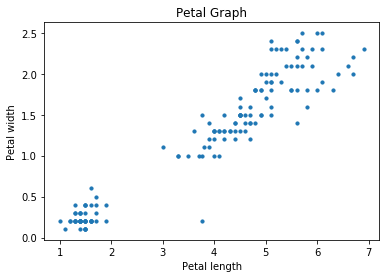

In [10]:
#Let's visualize them
#First, scatter plot
matplt.scatter(idata['petal_length'], idata['petal_width'], s=10)
matplt.xlabel('Petal length')
matplt.ylabel('Petal width')
matplt.title('Petal Graph')
matplt.show()
# Well, there is no flower of petal length 2-3, it is quite random

In [13]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
idata.loc[:,'class_label'] = class_le.fit_transform(idata['class'])
idata

,sepal_length,sepal_width,petal_length,petal_width,class,class_label
0,5.10000,3.50000,1.4,0.2,Iris-setosa,0
1,4.90000,3.00000,1.4,0.2,Iris-setosa,0
2,4.70000,3.20000,1.3,0.2,Iris-setosa,0
3,4.60000,3.10000,1.5,0.2,Iris-setosa,0
4,5.00000,3.60000,1.4,0.2,Iris-setosa,0
5,5.40000,3.90000,1.7,0.4,Iris-setosa,0
6,4.60000,3.40000,1.4,0.3,Iris-setosa,0
7,5.00000,3.40000,1.5,0.2,Iris-setosa,0
8,4.40000,2.90000,1.4,0.2,Iris-setosa,0
9,4.90000,3.10000,1.5,0.1,Iris-setosa,0


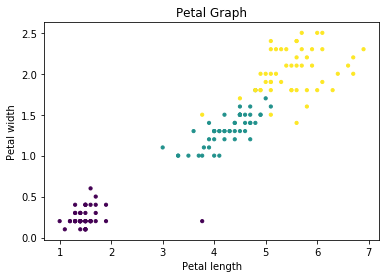

In [46]:
#Trying to plot with different colors
matplt.scatter(idata['petal_length'], idata['petal_width'], c=idata["class_label"], s=10)
matplt.xlabel('Petal length')
matplt.ylabel('Petal width')
matplt.title('Petal Graph')
matplt.show()
# Iris setosa is clearly the small flowers, there are just a few Versicolor and Virginica which can cause confusion

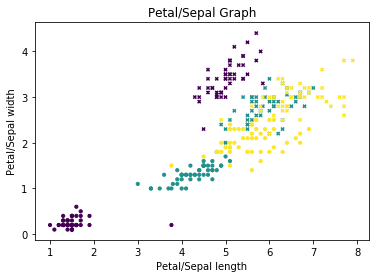

<Figure size 72000x72000 with 0 Axes>

In [24]:
#Putting petal and sepal together
matplt.scatter(idata['petal_length'], idata['petal_width'], label = 'Petal plot', c=idata['class_label'], s=10)
matplt.scatter(idata['sepal_length'], idata['sepal_width'], label = 'Sepal plot', c=idata['class_label'], marker= 'x', s=10)
matplt.xlabel('Petal/Sepal length')
matplt.ylabel('Petal/Sepal width')
matplt.title('Petal/Sepal Graph')
matplt.figure(figsize=(1000,1000))
matplt.show()

#Looks like petal and sepal width are inversely proportional
#Sepal length is a bit tricky!!!

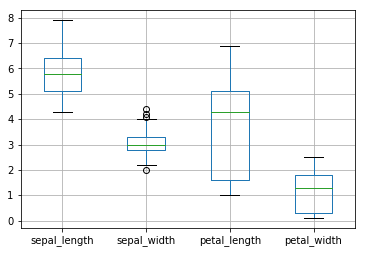

In [25]:
# Let's see boxplot
idata.boxplot(['sepal_length','sepal_width','petal_length','petal_width'])
#Alas! It is the mere graphical representation of idata.describe!

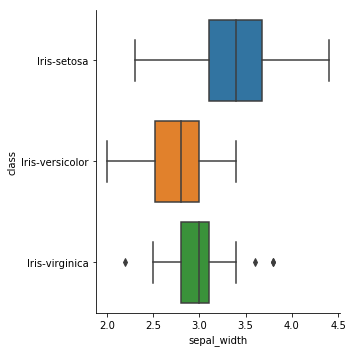

In [26]:
#Don't know what will happen
#Boxplot using seaborn
import seaborn as sns
sns.catplot(x="sepal_width", y="class", kind="box", data=idata);

#Well, what I see is Iris versicolor usually has low sepal width, Iris setosa has high width
#I really don't know what these rhombus means!
#These boxes are a lot better than matlib pyplot

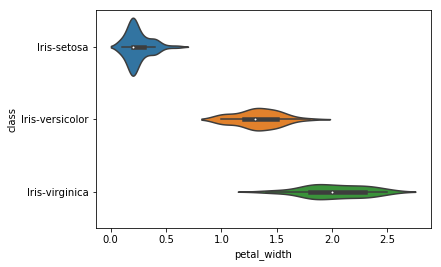

In [28]:
#Violin plot
sns.violinplot(x="petal_width", y="class", data=idata)
#Problem solved, yeah!

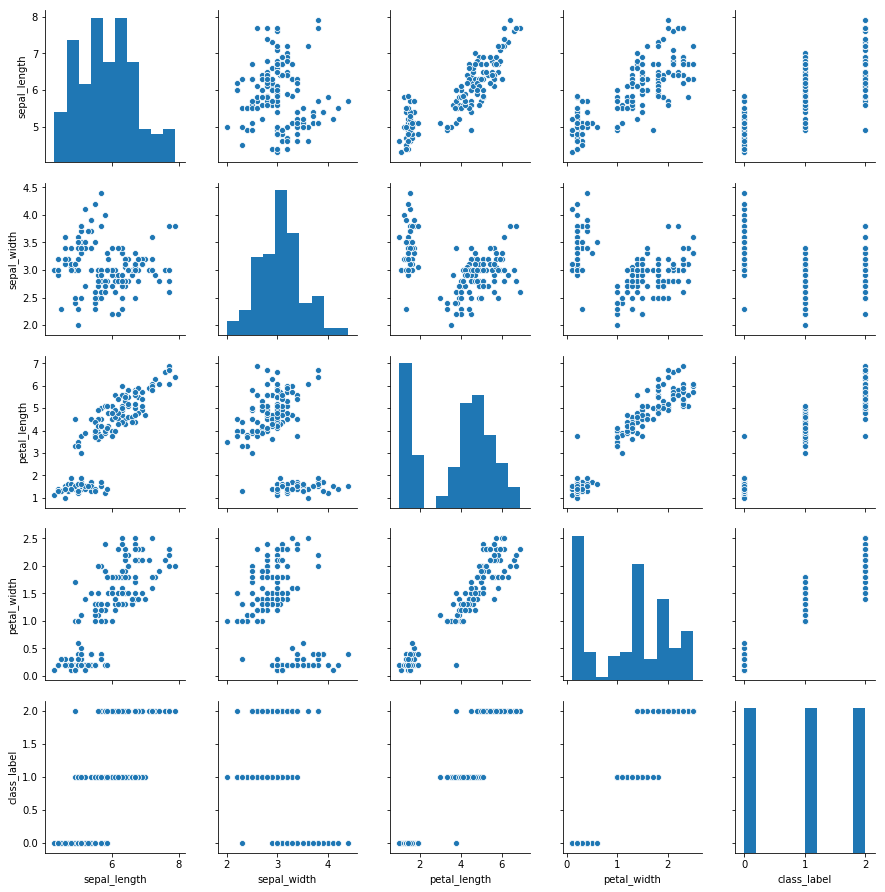

In [44]:
#Now for the pairplot
sns.pairplot(idata, palette="husl")

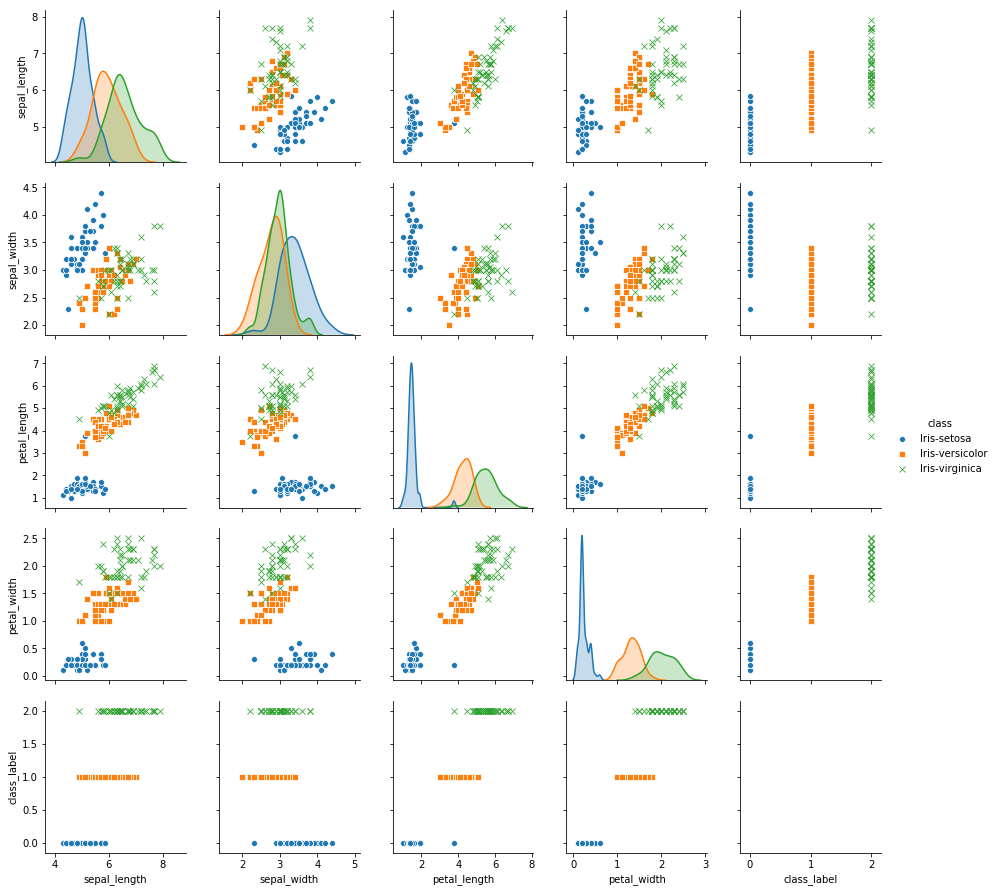

In [42]:
#Let's see if it plots with different colors
sns.pairplot(idata, hue="class", markers=['o', 's', 'x'])

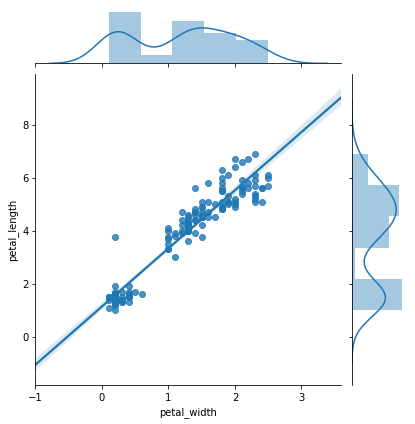

In [48]:
#Last one, the joint plot
sns.jointplot(x="petal_width", y="petal_length", data=idata, kind="reg")
#Job well done!

# Step 4- Model Building and Predicting¶

<b>Classification Overview<b>
In general words classification is to organize things into groups, as it help us understand the relationships between two members of the same group based on their similarity and also help us identify two groups based on their dis-similarity
The classification technique can be applied in Machine Learning and statistics which can be used for assigning input vectors to one of the K discrete classes. The classes have to be mutually exclusive to make sure that each input value belongs to a single class. Classification can be used to predict a class or ategory the data belongs to. It is widely used for different real-life problems like Spam Detection, Churn Prediction, Sentiment Analysis, Dog Breed Detection, Image Classification.
There are multiple type of Classification techniques.
Here, as part of this project we will apply KNN which stands for K-Nearest-Neighbours, which works on the principle of identifying K-Nearest Objects for a given object based on their similarity on different parameters

In [49]:
#Now into model building and predicting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [51]:
x = idata.drop(['class','class_label'], axis=1)
y = idata['class']

In [52]:
#Ok now,the real deal starts!
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [57]:
#This is it!
y_pred = classifier.predict(x)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-ve

In [58]:
#How accurate is this model?
accuracy_score(y, y_pred)
#96%

0.96

In [68]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(2, 20)

# list of scores from k_range
k_scores = []

# 1. We will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_values = knn.predict(x)
    # 3. obtain accuracy_score for KNeighborsClassifier with k neighbours
    scores = accuracy_score(y, y_values)
    # 4. append scores for k neighbors to k_scores list
    k_scores.append(scores)
print(k_scores)

[0.98, 0.9533333333333334, 0.9533333333333334, 0.96, 0.9666666666666667, 0.96, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.96, 0.9533333333333334, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.96, 0.9666666666666667]


In [4]:
#Looks like K=2 is the optimal value
#I could have done it a lot sooner but a good start!
#Lord have Mercy

SyntaxError: invalid syntax (<ipython-input-4-ebb7f259bb17>, line 4)